In [11]:
import obspy as obs
import matplotlib.pyplot as plt 
import numpy as np

from math import pow
from obspy.io.segy.core import _read_segy

In [24]:
path = "/home/andbro/Documents/MJR/scripts/sections_overview/data/processed/"
path = "/home/andbro/Documents/MJR/scripts/sections_overview/data/raw-offset_mod_flp/"

station = "s105"

    
if station == "s105":
    scale = {'ch1':3e-8, 'ch2':6e-8}
    

In [36]:
st = _read_segy(path+station+ch+".sgy", unpack_trace_headers=True)    

In [41]:
for j, tr in enumerate(st):
        tr.stats['distance'] = tr.stats.segy.trace_header.distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group


In [42]:

for n in range(0,len(st),1):

    dist = st[n].stats.distance/1000

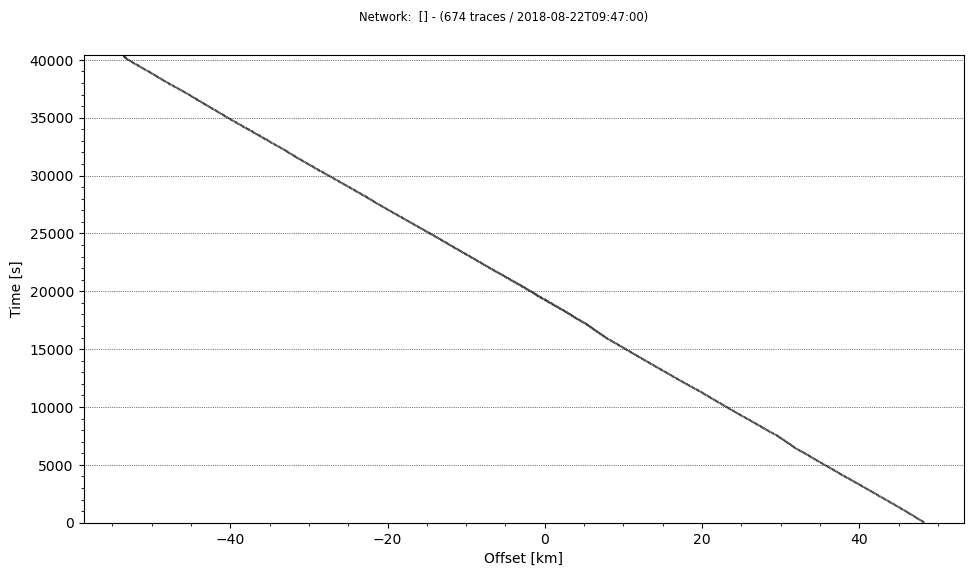

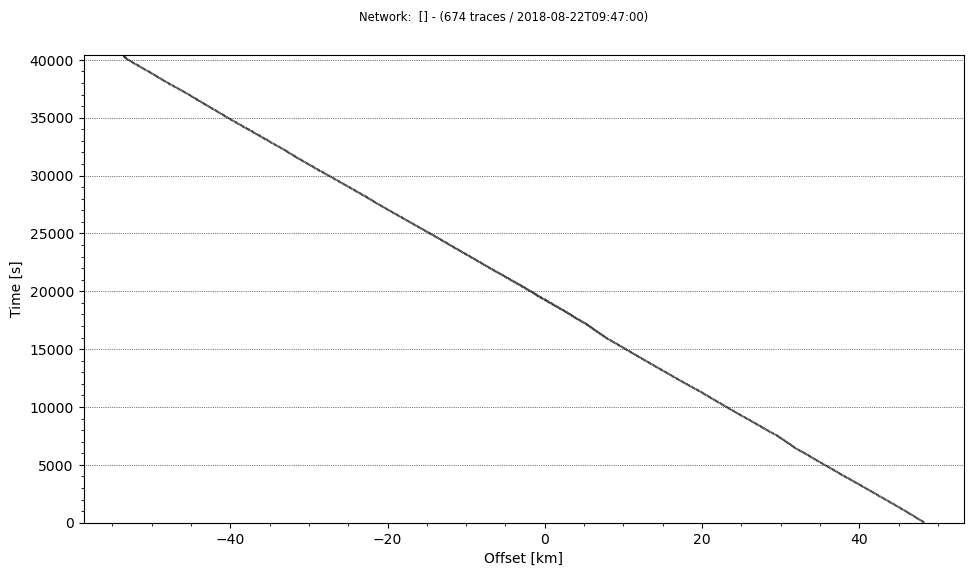

In [43]:
st.plot(type='section')

In [4]:
ch = "ch1"
st = _read_segy(path+station+ch+".sgy", unpack_trace_headers=True)    


for j, tr in enumerate(st):

        tr.stats['distance'] = tr.stats.segy.trace_header.distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group


## __________________________________________

fig, ax = plt.subplots(1, 1, figsize=(15,8))


for n in range(0,len(st),1):

    dist = st[n].stats.distance/1000

    t = np.arange(st[n].stats.npts)*st[n].stats.delta 

    y = st[n].data * scale[ch]  + dist
    

    t_reduced = t 

#     ax.plot(y, t_reduced, 'k', lw=0.5)

    ax.fill_betweenx(t_reduced, dist, y, where=(y>dist),color='k')


ax.set_ylim(0,6)
ax.set_xlim(st[0].stats.distance/1000, st[-1].stats.distance/1000)



FileNotFoundError: [Errno 2] No such file or directory: '/home/andbro/Documents/MJR/scripts/sections_overview/data/raw-offset_mod_flps105ch1.sgy'

0
1


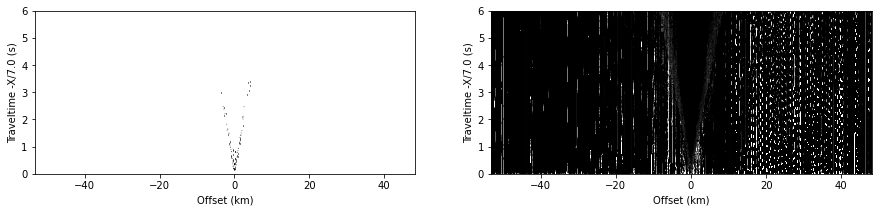

In [44]:
scale = {'ch1':5e-11, 'ch2':1e-8}

def __makeplot(station):


    ## __________________________________________
    
    N = 2
    fig, ax = plt.subplots(1, N, figsize=(15,3))
    
    
    for nn in range(N):
        print(nn)
        
        if nn == 0:
            st = _read_segy(path+station+"ch1.sgy", unpack_trace_headers=True) 
            sc = scale['ch1']
        if nn == 1:
            st = _read_segy(path+station+"ch2.sgy", unpack_trace_headers=True)    
            sc = scale['ch2']

        for j, tr in enumerate(st):

            tr.stats['distance'] = tr.stats.segy.trace_header.distance_from_center_of_the_source_point_to_the_center_of_the_receiver_group



        for n in range(0,len(st),1):

            dist = st[n].stats.distance/1000

            t = np.arange(st[n].stats.npts)*st[n].stats.delta 
            
            y = st[n].data
            
            ## normalize
#             max_value = max(y)
#             if max_value != 0:
#                 y  /= max_value  

            ## scaling 
            y *= sc
            
            y *= t**0.5
            
            ## perform clipping
#             clip_value = max(abs(y)) * 0.95
#             y = np.clip(y, -clip_value, clip_value)
            
            ## add offset 
            y += dist
            
#             ax[nn].plot(y, t, 'k', lw=0.0)

            ax[nn].fill_betweenx(t, dist, y, where=(y>dist),color='k')


        ax[nn].set_ylim(0,6)
        ax[nn].set_xlim(st[0].stats.distance/1000, st[-1].stats.distance/1000)

        ax[nn].set_xlabel('Offset (km)')
        ax[nn].set_ylabel('Traveltime -X/7.0 (s)')
        
    return fig

fig = __makeplot(station)

In [99]:
from andbro__savefig import __savefig

__savefig(fig, 
          outpath='/home/andbro/Documents/MJR/scripts/sections_overview/plots/', 
          outname=f'{station}.png', 
          mode='png',
         )



 saving png ...

